# Level 5
This notebooks explains the process of obtaining the prior mean and variance estimates for Level 5. It also shows how to generate the figures included in the manuscript.

In [1]:
# Imports
import numpy as np
from bayesian_agent import BayesianReplica
from estimate_agent import estimate_agent, find_mu
import pandas as pd
from concat_mean import concat_mean
from data_gen_meanPrior import data_gen_meanPrior
from data_gen_varPrior import data_gen_varPrior
from concat_var_mle import concat_var_mle
import matplotlib.pyplot as plt
import os

# Imports for ease of visualization
import warnings
import matplotlib as mpl
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch
import seaborn as sns

# Parameters for plotting
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="colorblind", font_scale=1.5, rc=custom_params)

In [2]:
data_dir = "../data"
experiment_name = "level_5"
source_of_data = "website_training_output"

folder_exp_data = os.path.join(
    data_dir,
    experiment_name,
    source_of_data,
)

In [3]:
# Generate data for mean prior estimation
# We have a set of files from experiments with different number of trials
# We will estimate the mean prior from each of these files and generate new data files

# Currently not using this

#data_gen_meanPrior()

file_list = ['26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '58', '59', '60', '61', '62', '63']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

# 0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000
#These are the files for mu

for i in range(len(file_list)):
    file = f'{folder_exp_data}/experiment_results ({file_list[i]}).csv'
    #mean = find_mu(file)
    # data_gen_varPrior(mean, out_path=f'var_mean_exp5_data_{file_id}.csv')

In [4]:
file_list = ['26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '58', '59', '60', '61', '62', '63']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

# Rename files into readable names
for i in range(len(file_list)):
    # Open experiment results file
    file = f'{folder_exp_data}/experiment_results ({file_list[i]}).csv'
    # Read it as pandas
    tmp = pd.read_csv(file)
    # Rename it and save with readable name
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_mu_{trials[i]}_trials.csv')
    
file_list_2 = ['42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57']
file_list_2_temp = ['64', '65', '66', '67', '68', '69']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

# Rename files into readable names
for i in range(len(file_list_2)):
    # Open experiment results file
    file = f'{folder_exp_data}/experiment_results ({file_list_2[i]}).csv'
    # Read it as pandas
    tmp = pd.read_csv(file)
    # Rename it and save with readable name
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_variance_{trials[i]}_trials.csv')
    
for i in range(len(file_list_2_temp)):
    file_id = file_list_2_temp[i]

    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    tmp = pd.read_csv(file)
    tmp.to_csv(f'{folder_exp_data}/experiment_results/experiment_results_variance_{trials[16+i]}_trials.csv')



In [5]:
mu_list = []
sigma_list = []
internal_std_list = []

for i in range(len(trials)):
    # Experiments that find mu
    file_mean = f'{folder_exp_data}/experiment_results/experiment_results_mu_{trials[i]}_trials.csv'
    # Get the mean estimate
    mu_environment = find_mu(file_mean)
    
    # Open experiment results file to get variance
    file_experiments = f'{folder_exp_data}/experiment_results/experiment_results_variance_{trials[i]}_trials.csv'
    # Group and sort values
    data = concat_var_mle(file_experiments)
    
    # Estimate agent  parameters
    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mu_environment)
    mu_list.append(mu_prior)
    sigma_list.append(sigma_prior_mle)
    internal_std_list.append(sigma_internal_mle)

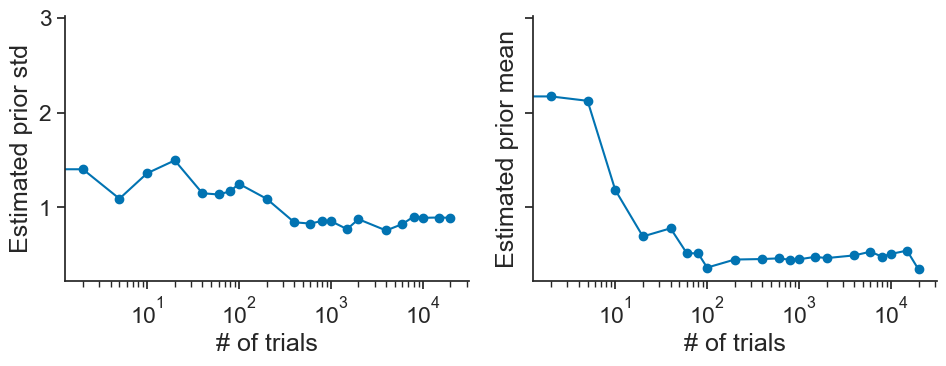

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    
axes[0].plot(trials, sigma_list, marker='o')
axes[0].set_xscale('log')
axes[0].set_xlabel('# of trials')
axes[0].set_ylabel('Estimated prior std')
axes[0].grid(False)


axes[1].plot(trials, mu_list, marker='o')
axes[1].set_xscale('log')
axes[1].set_xlabel('# of trials')
axes[1].set_ylabel('Estimated prior mean')

axes[1].grid(False)

plt.tight_layout()
plt.show()


In [ ]:
plt.plot(trials, internal_std_list, marker='o')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior std')
#plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(False)
plt.show()

In [8]:

# def mse(mu_list, mu_list_agent):
#     mu_array = np.array(mu_list[:len(mu_list_agent)])  # match lengths
#     agent_array = np.array(mu_list_agent)
#     return np.mean((mu_array - agent_array) ** 2)

# def simulate_agent(mu_final, sigma_final, mu_init, sigma_init, internal_std, measurement_noise):
#     agent = BayesianReplica(mu_init, sigma_init, internal_std)
#     mu_list_agent = []
    
#     for n_trials in trials:
#         mu_prior, sigma_prior = agent.get_prior()
#         mu_list_agent.append(mu_prior)
#         agent.reset_agent()
#         agent.train_agent_kalmann_m_noise_z_var(n_trials, mu_final, sigma_final, measurement_noise)
    
#     return mu_list_agent

# from scipy.optimize import minimize_scalar

# def objective(noise):
    
#     mse_total = 0
#     for _ in range(10):
#         mu_list_agent = simulate_agent(0.48, 0.87, 2.89, 1.136, 0.15, noise)
#         mse_value = mse(mu_list, mu_list_agent)
#         mse_total += mse_value
#     mse_avg = mse_total / 10
#     return mse_avg

# res = minimize_scalar(objective, bounds=(0.1, 10.0), method='bounded')
# best_noise = res.x
# print("Best measurement noise:", best_noise)
# def estimate_noise():
#     res = minimize_scalar(
#         objective,
#         bounds=(1.0, 3.0),
#         method='bounded'
#     )
#     return res.x

# n_boot = 100         # 200–500 is usually enough
# noise_boot = np.zeros(n_boot)

# for b in range(n_boot):
#     noise_boot[b] = estimate_noise()


# alpha = 0.05

# ci_low = np.percentile(noise_boot, 100 * alpha / 2)
# ci_high = np.percentile(noise_boot, 100 * (1 - alpha / 2))

# print(f"Measurement noise estimate: {best_noise:.4f}")
# print(f"95% bootstrap CI: [{ci_low:.4f}, {ci_high:.4f}]")

Finding the mean after N trials

In [ ]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_kf_agent = []
sigma_list_kf_agent = []
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_kf_agent.append(mu_prior)
    sigma_list_kf_agent.append(sigma_prior)
    agent.reset_agent()
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
    
measurement_noise = 2 #1.96 # Why is this different?

agent = BayesianReplica(mu_init, sigma_init, internal_std)
mu_list_ekf_agent = []
sigma_list_ekf_agent = []
for n_trials in trials:
    mu_prior, sigma_prior = agent.get_prior()
    mu_list_ekf_agent.append(mu_prior)
    sigma_list_ekf_agent.append(sigma_prior)
    agent.reset_agent()
    # Obtain mean
    agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
    # Retrain and replace variance
    agent.train_agent_EKF_sq_residuals(n_trials, mu_final, sigma_final, measurement_noise)


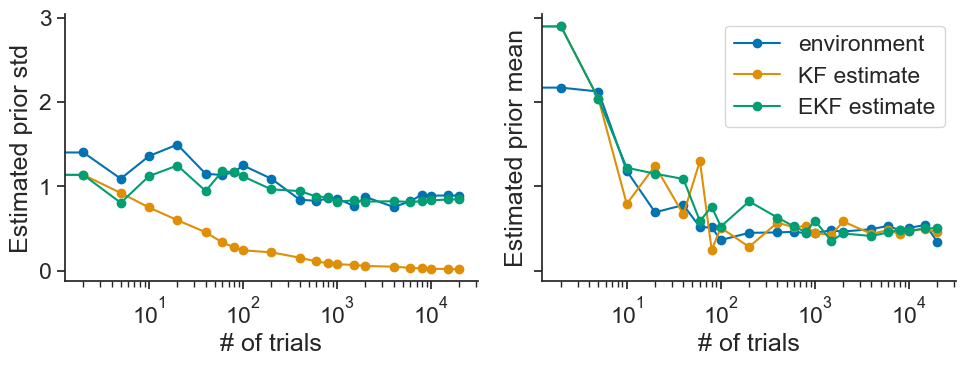

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    
axes[0].plot(trials, sigma_list, marker='o', label="environment")
axes[0].plot(trials, sigma_list_kf_agent, marker='o', label="KF estimate")
axes[0].plot(trials, sigma_list_ekf_agent, marker='o', label="EKF estimate")
axes[0].set_xscale('log')
axes[0].set_xlabel('# of trials')
axes[0].set_ylabel('Estimated prior std')
axes[0].grid(False)


axes[1].plot(trials, mu_list, marker='o', label="environment")
axes[1].plot(trials, mu_list_kf_agent, marker='o', label="KF estimate")
axes[1].plot(trials, mu_list_ekf_agent, marker='o', label="EKF estimate")
axes[1].set_xscale('log')
axes[1].set_xlabel('# of trials')
axes[1].set_ylabel('Estimated prior mean')

axes[1].grid(False)
axes[1].legend()

plt.tight_layout()
plt.show()

In [15]:
def mse(true_list, pred_list):
    # Make sure both lists have the same length
    min_len = min(len(true_list), len(pred_list))
    return np.mean((np.array(true_list[:min_len]) - np.array(pred_list[:min_len]))**2)

In [37]:
k_values = np.linspace(1, 100, 20)  # Try 20 values from 1 to 100, adjust range as needed
best_k = None
lowest_mse = float('inf')

for k in k_values:
    agent = BayesianReplica(mu_init, sigma_init, internal_std)
    mu_list_agent = []
    sigma_list_agent = []

    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent.append(mu_prior)
        sigma_list_agent.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
        agent.train_agent_EKF_absolute(n_trials, mu_final, sigma_final, measurement_noise)#, k)

    current_mse = mse(sigma_list, sigma_list_agent)
        
    if current_mse < lowest_mse:
        lowest_mse = current_mse
        best_k = k

print("Best k:", best_k)
print("Lowest MSE:", lowest_mse)


Best k: 11.421052631578947
Lowest MSE: 0.11526210122411044
